In [2]:
from anisotropy.core.database import Database, Structure
import pandas
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn
import numpy
import warnings

# ignore some warnings, especially from seaborn
warnings.filterwarnings('ignore')

In [3]:
db = Database("anisotropy", "woPrismaticLayer")
db.setup()

In [4]:
res = db.search([])
df = DataFrame(res)

df_prep = df[[
    col for col in df.columns 
        if not isinstance(df[col][0], str) 
            and not isinstance(df[col][0], numpy.bool_)
            and not isinstance(df[col][0], dict)
            and not isinstance(df[col][0], list)
            and not df[col][0] is None
            and not col[-3: ] == "_id"
]]

In [5]:
df_prep = df_prep.assign(direction = df["direction"].astype("str"))
df_prep = df_prep.assign(type = df["type"])

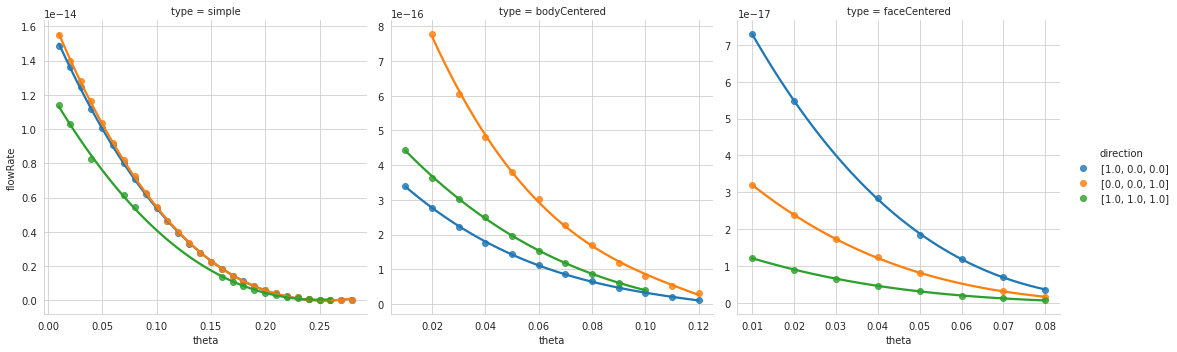

In [5]:
seaborn.set_style('whitegrid')
seaborn.lmplot(
    x = "theta", y = "flowRate", 
    hue = "direction", col = "type", 
    data = df_prep, order = 3, 
    sharex = False, sharey = False, ci = None)

In [6]:
failed = df[["type", "direction", "theta", "meshStatus", "flowStatus"]][
    (df["meshStatus"] == "Failed") | (df["flowStatus"] == "Failed")
].assign(
    direction = df["direction"].astype("str")
).sort_values(
    by = ["type", "direction", "theta"]
)
failed

,type,direction,theta,meshStatus,flowStatus
101,bodyCentered,"[0.0, 0.0, 1.0]",0.01,Done,Failed
113,bodyCentered,"[0.0, 0.0, 1.0]",0.13,Done,Failed
114,bodyCentered,"[0.0, 0.0, 1.0]",0.14,Failed,Idle
115,bodyCentered,"[0.0, 0.0, 1.0]",0.15,Failed,Idle
117,bodyCentered,"[0.0, 0.0, 1.0]",0.17,Failed,Idle
96,bodyCentered,"[1.0, 0.0, 0.0]",0.13,Done,Failed
97,bodyCentered,"[1.0, 0.0, 0.0]",0.14,Failed,Idle
98,bodyCentered,"[1.0, 0.0, 0.0]",0.15,Failed,Idle
99,bodyCentered,"[1.0, 0.0, 0.0]",0.16,Failed,Idle
100,bodyCentered,"[1.0, 0.0, 0.0]",0.17,Failed,Idle


<AxesSubplot:xlabel='theta', ylabel='chordalError'>

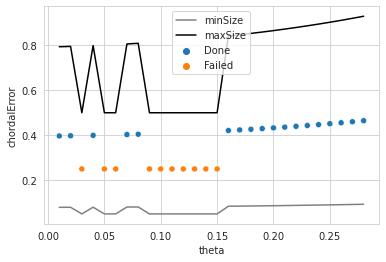

In [12]:
simple3 = df.assign(direction = df["direction"].astype("str"))
simple3 = simple3[
    (simple3["type"] == "simple") & (simple3["direction"] == "[1.0, 1.0, 1.0]")
]

seaborn.scatterplot(data = simple3, x = "theta", y = "chordalError", hue = "meshStatus")
seaborn.lineplot(data = simple3, x = "theta", y = "minSize", color = "grey", label = "minSize")
seaborn.lineplot(data = simple3, x = "theta", y = "maxSize", color = "black", label = "maxSize")

<AxesSubplot:xlabel='theta', ylabel='fillets'>

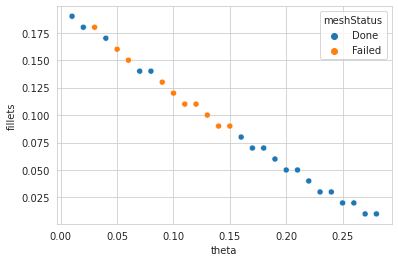

In [13]:
seaborn.scatterplot(data = simple3.round({ "fillets": 2 }), x = "theta", y = "fillets", hue = "meshStatus")

<AxesSubplot:xlabel='theta', ylabel='chordalError'>

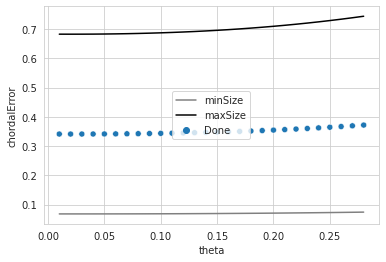

In [42]:
simple1 = df.assign(direction = df["direction"].astype("str"))
simple1 = simple1[
    (simple1["type"] == "simple") & (simple1["direction"] == "[1.0, 0.0, 0.0]")
]

seaborn.scatterplot(data = simple1, x = "theta", y = "chordalError", hue = "meshStatus")
seaborn.lineplot(data = simple1, x = "theta", y = "minSize", color = "grey", label = "minSize")
seaborn.lineplot(data = simple1, x = "theta", y = "maxSize", color = "black", label = "maxSize")

<AxesSubplot:xlabel='theta', ylabel='fillets'>

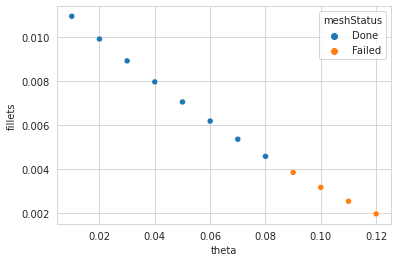

In [8]:
fc = df.assign(direction = df["direction"].astype("str"))
fc = fc[
    (fc["type"] == "faceCentered") & (fc["direction"] == "[1.0, 1.0, 1.0]")
]
seaborn.set_style('whitegrid')
seaborn.scatterplot(data = fc, x = "theta", y = "fillets", hue = "meshStatus")

In [5]:
general: list = db.loadGeneral()
dfe: list = [] #DataFrame()

In [2]:
def pandasify(listOfDicts):
    dfe: list = []
    
    for entry in listOfDicts:
        structure: dict = entry["structure"]
        extended: dict = db.load(structure["type"], structure["direction"], structure["theta"])
        fields: list = extended.keys()

        for key in fields:
            extended[key] = pandas.json_normalize(extended[key])

        dfe.append(extended)

    dfe: DataFrame = DataFrame(dfe)
    dfe: Series = Series(
        [ pandas.concat(dfe[field].to_list(), ignore_index = True) for field in dfe.keys() ],
        dfe.keys()
    )
    
    return dfe

In [6]:
from anisotropy.core.main import Anisotropy

In [8]:
model = Anisotropy()
params = model.loadFromScratch("test_anisotropy.toml")

In [9]:
len(params)

171

In [10]:
dfparams = pandasify(params)

In [15]:
dfparams.structure[dfparams.structure.type == "simple"]

,structure_id,type,direction,theta,r0,L,radius,filletsEnabled,fillets
0,1,simple,"[1.0, 0.0, 0.0]",0.01,1.0,2.0,1.010101,True,0.191919
1,2,simple,"[1.0, 0.0, 0.0]",0.02,1.0,2.0,1.020408,True,0.183900
2,3,simple,"[1.0, 0.0, 0.0]",0.03,1.0,2.0,1.030928,True,0.175945
3,4,simple,"[1.0, 0.0, 0.0]",0.04,1.0,2.0,1.041667,True,0.168056
4,5,simple,"[1.0, 0.0, 0.0]",0.05,1.0,2.0,1.052632,True,0.160234
...,...,...,...,...,...,...,...,...,...
79,80,simple,"[1.0, 1.0, 1.0]",0.24,1.0,2.0,1.315789,True,0.028070
80,81,simple,"[1.0, 1.0, 1.0]",0.25,1.0,2.0,1.333333,True,0.022222
81,82,simple,"[1.0, 1.0, 1.0]",0.26,1.0,2.0,1.351351,True,0.016517
82,83,simple,"[1.0, 1.0, 1.0]",0.27,1.0,2.0,1.369863,True,0.010959
